In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Airline Passenger Satisfaction

This research is to analyzing customer satisfaction of Airline services from booking until arrival, hope this will help the Airline to improve the services to their customers

There is the following information about the passengers of some airline:

1. Gender: male or female
2. Customer type: regular or non-regular airline customer
3. Age: the actual age of the passenger
4. Type of travel: the purpose of the passenger's flight (personal or business travel)
5. Class: business, economy, economy plus
6. Flight distance
7. Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)
9. Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)
10. Gate location: level of satisfaction with the gate location (0: not rated; 1-5)
11. Food and drink: food and drink satisfaction level (0: not rated; 1-5)
12. Online boarding: satisfaction level with online boarding (0: not rated; 1-5)
13. Seat comfort: seat satisfaction level (0: not rated; 1-5)
14. Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
15. On-board service: level of satisfaction with on-board service (0: not rated; 1-5)
16. Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)
17. Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)
18. Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)
19. Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)
20. Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)
21. Departure delay in minutes
22. Arrival delay in minutes
23. satisfaction: satisfied / neutral or dissatisfied (the target)

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.Gender.value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [5]:
df['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [6]:
df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [7]:
df.Class.value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [12]:
satisfaction = df.satisfaction.value_counts()

In [19]:
satisfaction_label = df.satisfaction.unique()
satisfaction_label

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

# Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### drop column Arrival Delay in Minutes, Departure Delay in Minutes, id and unnamed

In [3]:
df = df.drop(['Unnamed: 0', 'id','Arrival Delay in Minutes' , 'Departure Delay in Minutes'], axis = 1)

### divide data based on data type

#### Numerical

In [11]:
num_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = df.select_dtypes(include=num_dtypes)
num = num_df.columns

print(num)

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'],
      dtype='object')


In [12]:
df[num].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Categorical

In [13]:
cat_dtypes = ['object']

cat_df = df.select_dtypes(include=cat_dtypes)
cat = cat_df.columns

print(cat)

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')


In [14]:
df[cat].describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


## CatPlot

In [3]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height() / 2 - 0.05
        ax.annotate(percentage, (x, y), size = 12)

Text(0.5, 1.0, 'Satisfaction Level')

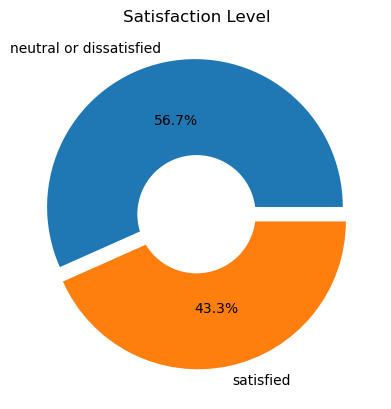

In [35]:
explode = (0.05, 0.05)
plt.pie(satisfaction, labels = satisfaction_label,
        autopct='%0.01f%%',
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.title('Satisfaction Level')

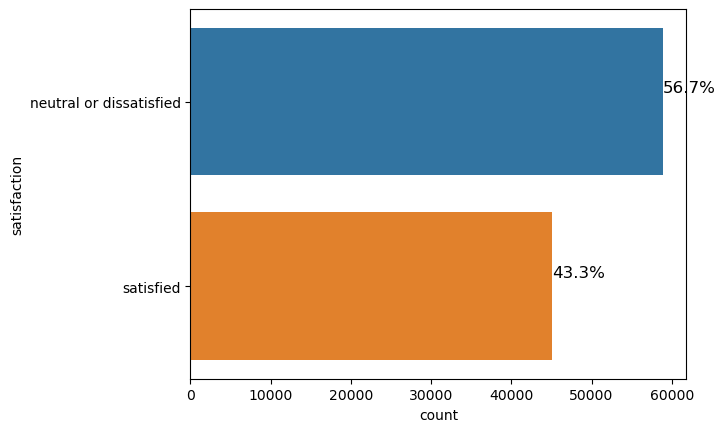

In [16]:
ax = sns.countplot(y ='satisfaction', data = df)
without_hue(ax, df.satisfaction)

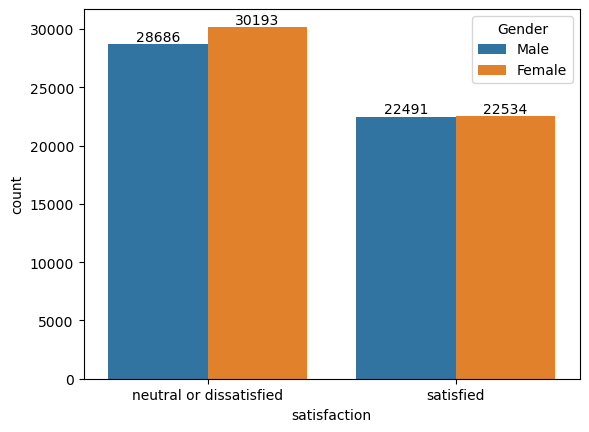

In [17]:
ax1 = sns.countplot(x ='satisfaction', hue = "Gender", data = df)
for label in ax1.containers:
    ax1.bar_label(label)

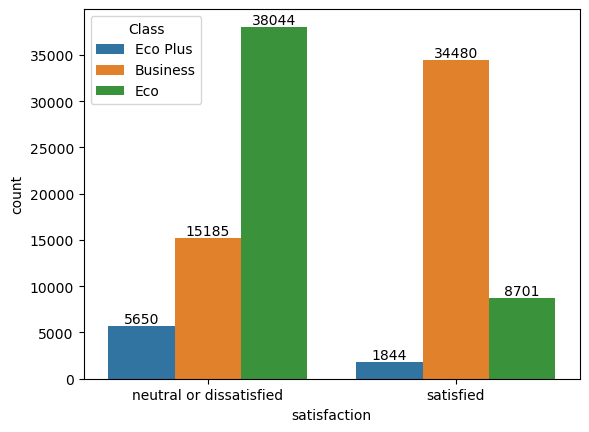

In [18]:
ax2 = sns.countplot(x ='satisfaction', hue = "Class", data = df)
for label in ax2.containers:
    ax2.bar_label(label)

In [34]:
def without_hue2(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() 
        ax.annotate(percentage, (x, y), size = 12)

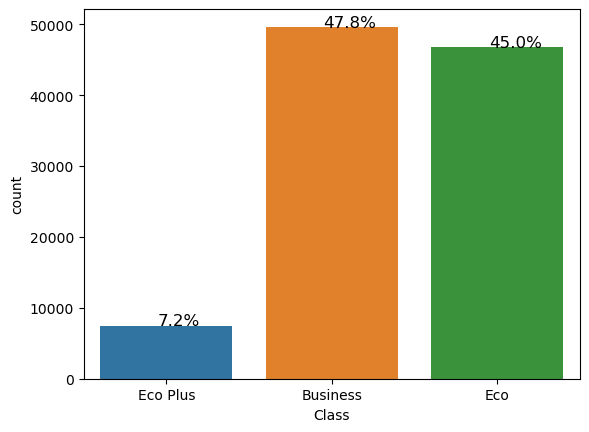

In [35]:
ax2 = sns.countplot(x ='Class', data = df)
without_hue2(ax2, df.Class)

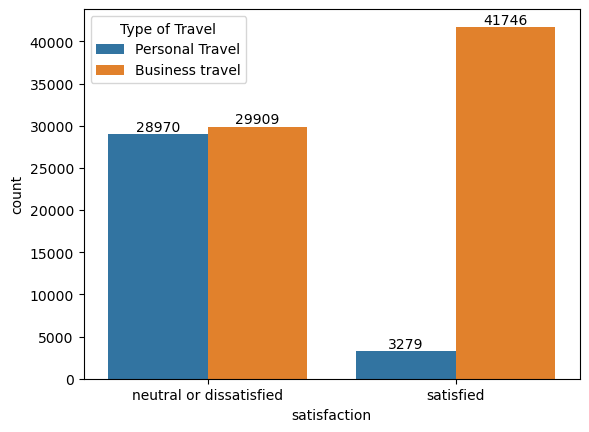

In [19]:
ax2 = sns.countplot(x ='satisfaction', hue = "Type of Travel", data = df)
for label in ax2.containers:
    ax2.bar_label(label)

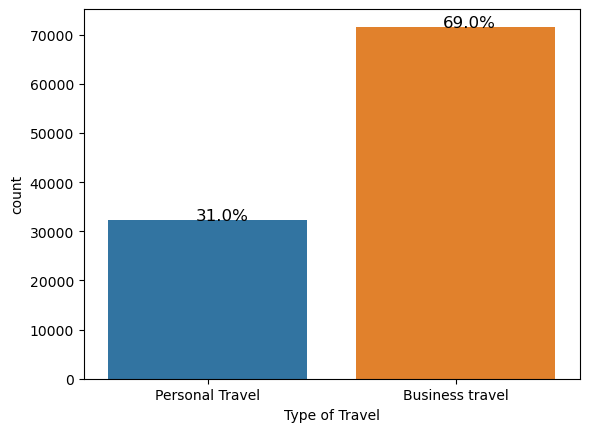

In [38]:
ax2 = sns.countplot(x ='Type of Travel', data = df)
without_hue2(ax2, df.satisfaction)

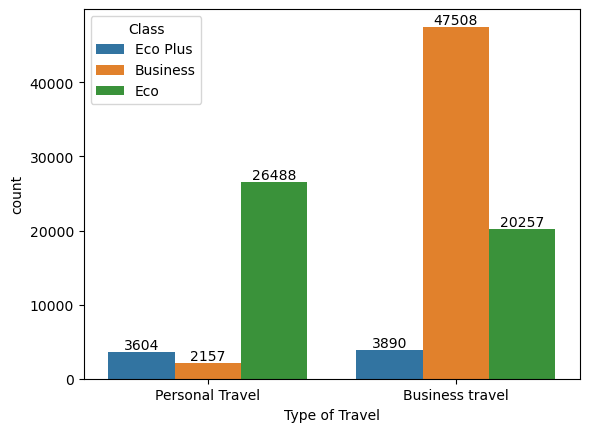

In [21]:
ax2 = sns.countplot(x ='Type of Travel', hue = 'Class' , data = df)
for label in ax2.containers:
    ax2.bar_label(label)

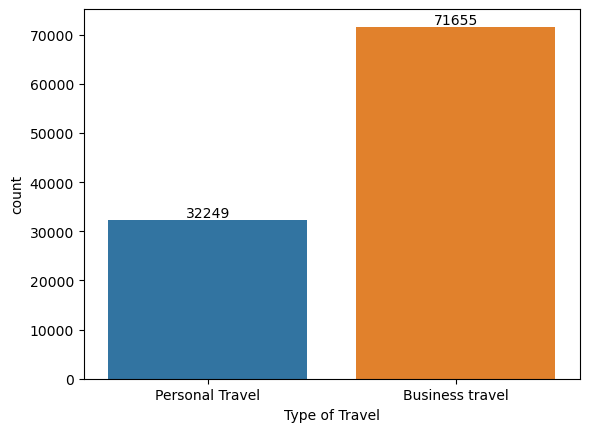

In [4]:
ax2 = sns.countplot(x ='Type of Travel', data = df)
for label in ax2.containers:
    ax2.bar_label(label)

## NumPlot

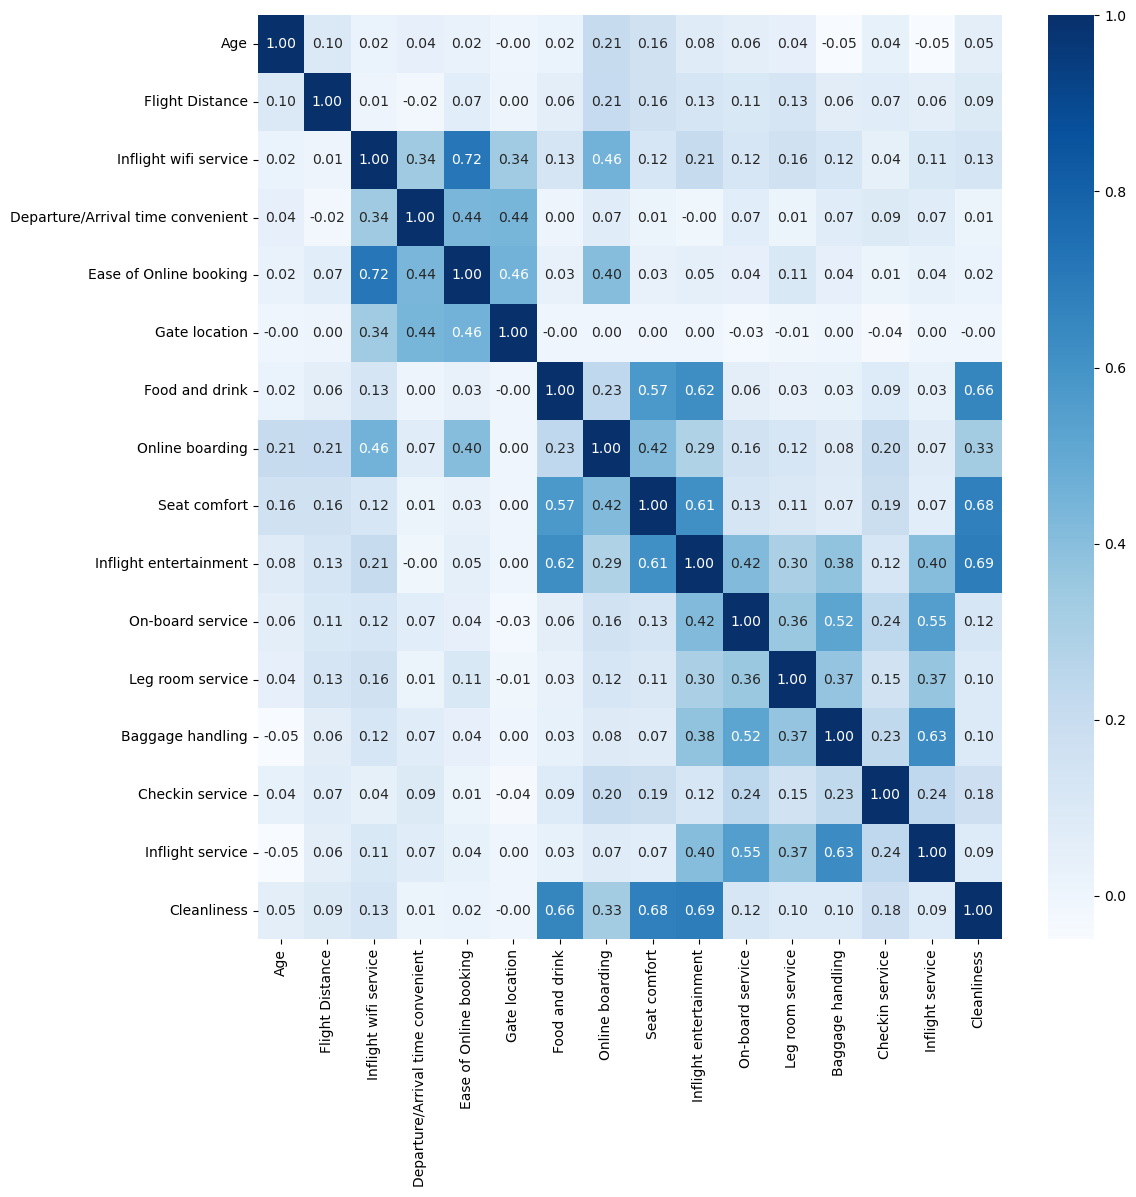

In [22]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

In [23]:
Age = df.groupby(['satisfaction'])['Age'].agg({'mean','median'}).reset_index()
Flight_Distance = df.groupby(['satisfaction'])['Flight Distance'].agg({'mean','median'}).reset_index()

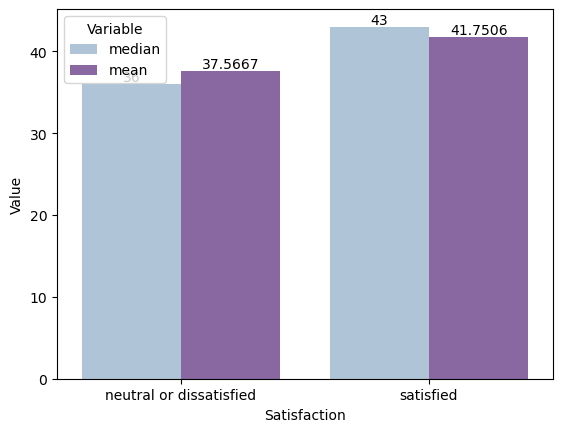

In [24]:
Age_vs_target = Age.melt(id_vars=['satisfaction']).rename(columns=str.title)
g = sns.barplot(x='Satisfaction', y='Value', hue='Variable', data=Age_vs_target, palette='BuPu')
for label in g.containers:
    g.bar_label(label)

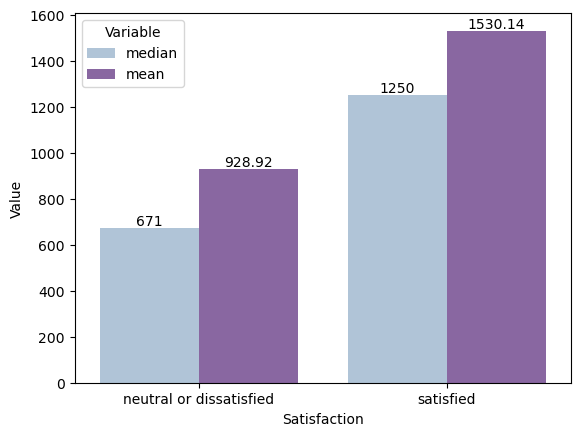

In [25]:
Flight_Distance_vs_target = Flight_Distance.melt(id_vars=['satisfaction']).rename(columns=str.title)
g = sns.barplot(x='Satisfaction', y='Value', hue='Variable', data=Flight_Distance_vs_target, palette='BuPu')
for label in g.containers:
    g.bar_label(label)

In [26]:
def no_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

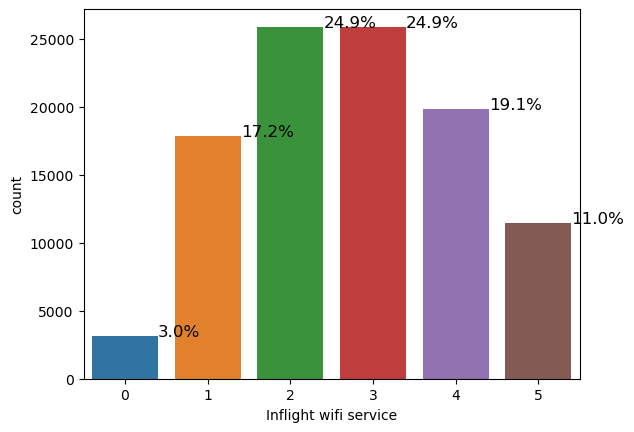

In [27]:
ax = sns.countplot(x = 'Inflight wifi service', data = df)
no_hue(ax, df['Inflight wifi service'])

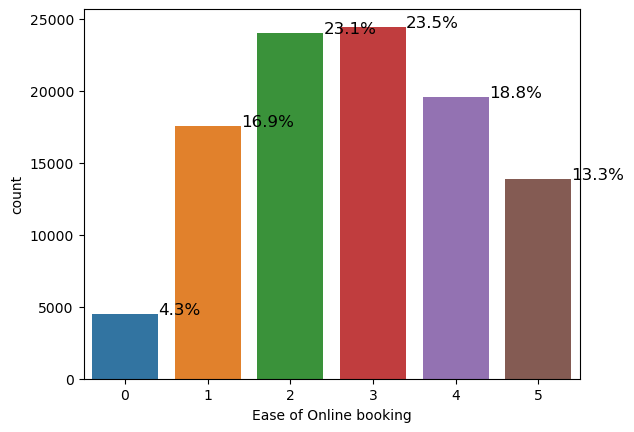

In [28]:
ax = sns.countplot(x = 'Ease of Online booking', data = df)
no_hue(ax, df['Ease of Online booking'])

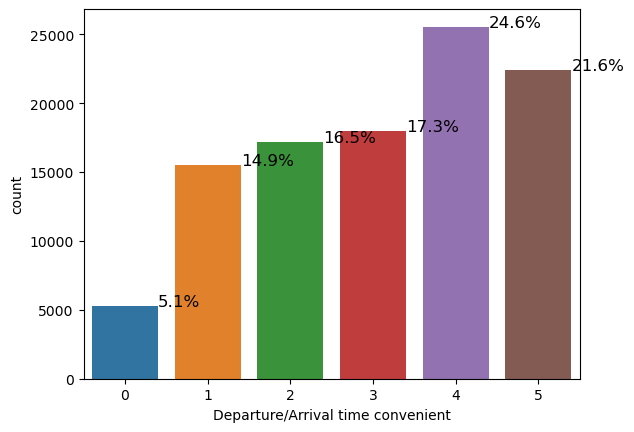

In [29]:
ax = sns.countplot(x = 'Departure/Arrival time convenient', data = df)
no_hue(ax, df['Departure/Arrival time convenient'])

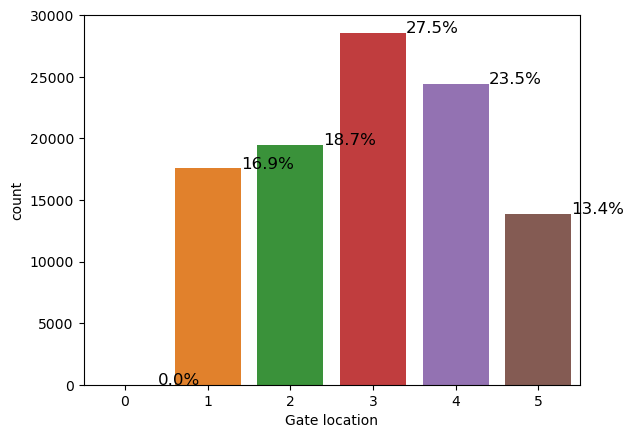

In [30]:
ax = sns.countplot(x = 'Gate location', data = df)
no_hue(ax, df['Gate location'])

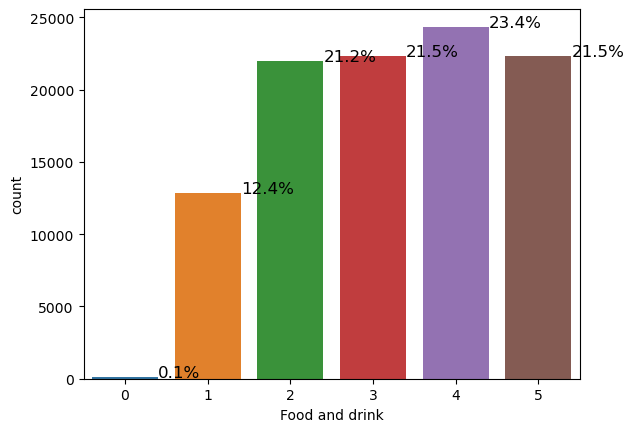

In [31]:
ax = sns.countplot(x = 'Food and drink', data = df)
no_hue(ax, df['Food and drink'])

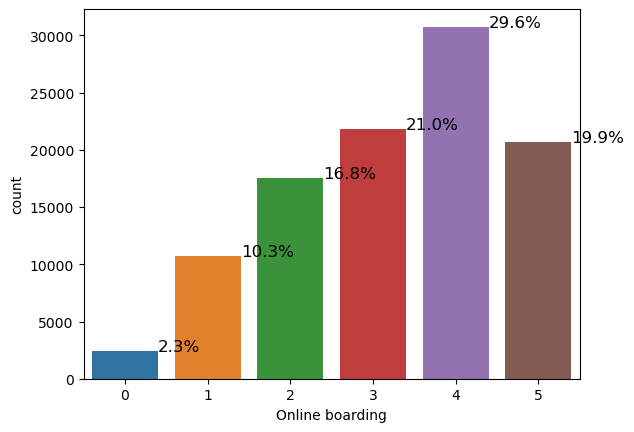

In [32]:
ax = sns.countplot(x = 'Online boarding', data = df)
no_hue(ax, df['Online boarding'])

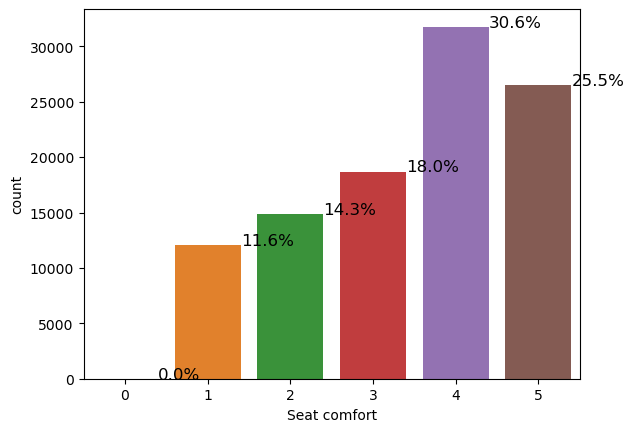

In [33]:
ax = sns.countplot(x = 'Seat comfort', data = df)
no_hue(ax, df['Seat comfort'])

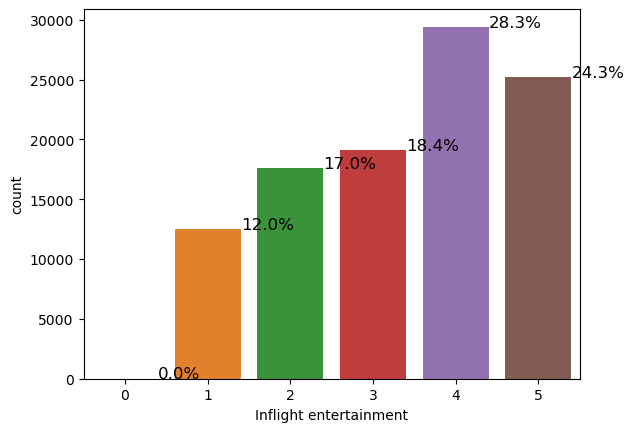

In [34]:
ax = sns.countplot(x = 'Inflight entertainment', data = df)
no_hue(ax, df['Inflight entertainment'])

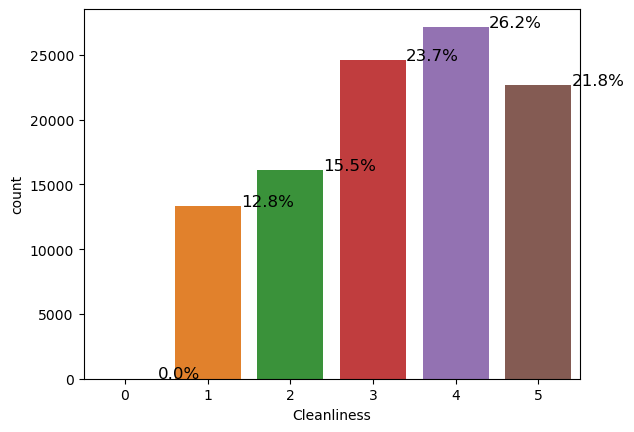

In [35]:
ax = sns.countplot(x = 'Cleanliness', data = df)
no_hue(ax, df.Cleanliness)

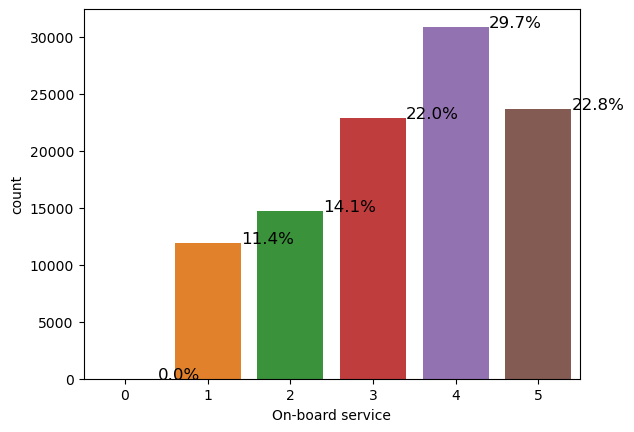

In [36]:
ax = sns.countplot(x = 'On-board service', data = df)
no_hue(ax, df['On-board service'])

In [38]:
#grouping age by Kmeans process on excel
def grouped_age(df):
    if (df['Age'] >= 5) & (df['Age'] <= 12):
        return '0'
    elif (df['Age'] >= 13) & (df['Age'] <= 37):
        return '1'
    elif (df['Age'] >= 38):
        return '2'

Pengelompokan usia telah ditentukan berdasarkan algoritma KMeans yang dihitung di file excel terpisah.<br>
Adapun hasil kriteria pengelompokan didapatkan sebagai berikut:<br>
   - C1(0) = 5 - 12 tahun<br>
   - C2(1) = 13 - 37 tahun<br>
   - C3(2) = 38 - 85 tahun<br>

In [39]:
df['age_group'] = df.apply(grouped_age, axis = 1)
data = df.drop('Age', axis = 1)

In [40]:
from sklearn import preprocessing

In [41]:
scale_mapper_stat_gender = {'Female':0, 'Male':1}
data['Gender'] = data['Gender'].replace(scale_mapper_stat_gender)

In [42]:
scale_mapper_stat_custype = {'disloyal Customer':0, 'Loyal Customer':1}
data['Customer Type'] = data['Customer Type'].replace(scale_mapper_stat_custype)

In [43]:
scale_mapper_stat_ToT = {'Personal Travel':0, 'Business travel':1}
data['Type of Travel'] = data['Type of Travel'].replace(scale_mapper_stat_ToT)

In [44]:
scale_mapper_stat_class = {'Eco':0, 'Eco Plus':1, 'Business': 2}
data['Class'] = data['Class'].replace(scale_mapper_stat_class)

In [45]:
scale_mapper_stat_satisfied = {'neutral or dissatisfied':0, 'satisfied':1}
data['satisfaction'] = data['satisfaction'].replace(scale_mapper_stat_satisfied)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  int64 
 1   Customer Type                      103904 non-null  int64 
 2   Type of Travel                     103904 non-null  int64 
 3   Class                              103904 non-null  int64 
 4   Flight Distance                    103904 non-null  int64 
 5   Inflight wifi service              103904 non-null  int64 
 6   Departure/Arrival time convenient  103904 non-null  int64 
 7   Ease of Online booking             103904 non-null  int64 
 8   Gate location                      103904 non-null  int64 
 9   Food and drink                     103904 non-null  int64 
 10  Online boarding                    103904 non-null  int64 
 11  Seat comfort                       103904 non-null  

#### Memisahkan feature (X) dan target (y)

In [58]:
X = data.drop("satisfaction", axis = 1)
y = data['satisfaction']

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import rcParams

In [66]:
rcParams['figure.figsize'] = (25,20)

#### Memisahkan data test (20%) dan data train (80%)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNearestneighboor

In [50]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.5f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.5f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.5f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.5f" % f1_score(ytest, pred))

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
eval_classification(knn, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.86002
Precision (Test Set): 0.86911
Recall (Test Set): 0.79963
F1-Score (Test Set): 0.83292


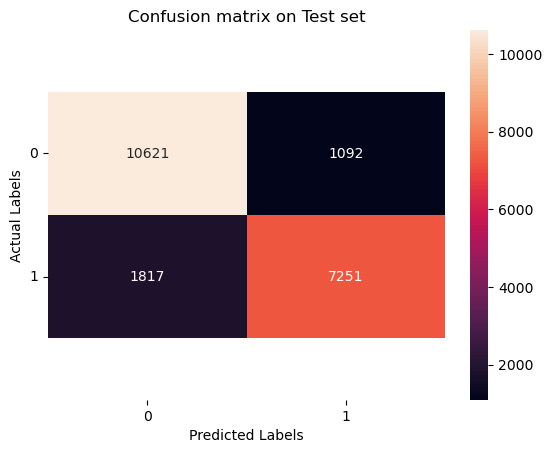

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     11713
           1       0.87      0.80      0.83      9068

    accuracy                           0.86     20781
   macro avg       0.86      0.85      0.86     20781
weighted avg       0.86      0.86      0.86     20781



In [52]:
plt.title("Confusion matrix on Test set")
ax1 = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, y_pred))

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
ypred_dt = dt.predict(X_test)
eval_classification(dt, ypred_dt, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94692
Precision (Test Set): 0.93720
Recall (Test Set): 0.94144
F1-Score (Test Set): 0.93932


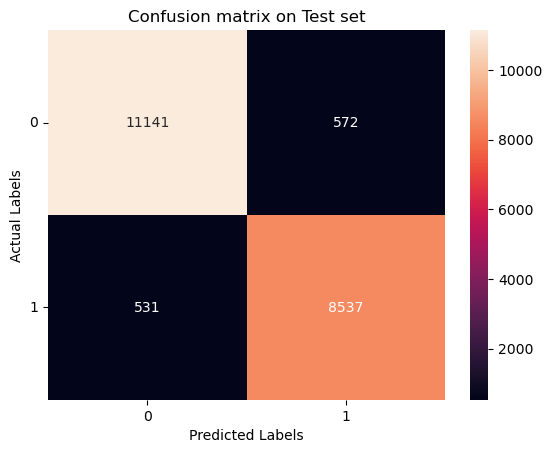

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



In [60]:
plt.title("Confusion matrix on Test set")
ax2 = sns.heatmap(confusion_matrix(y_test, ypred_dt), annot=True, fmt='d')
bottom, top = ax2.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()
print(classification_report(y_test, ypred_dt))

In [67]:
dt1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt1.fit(X_train,y_train)
ypred_dt1 = dt1.predict(X_test)
eval_classification(dt, ypred_dt1, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.90506
Precision (Test Set): 0.89439
Recall (Test Set): 0.88719
F1-Score (Test Set): 0.89077


In [61]:
fn = X.columns[:20]
cn = y.unique().tolist()
cn

['neutral or dissatisfied', 'satisfied']

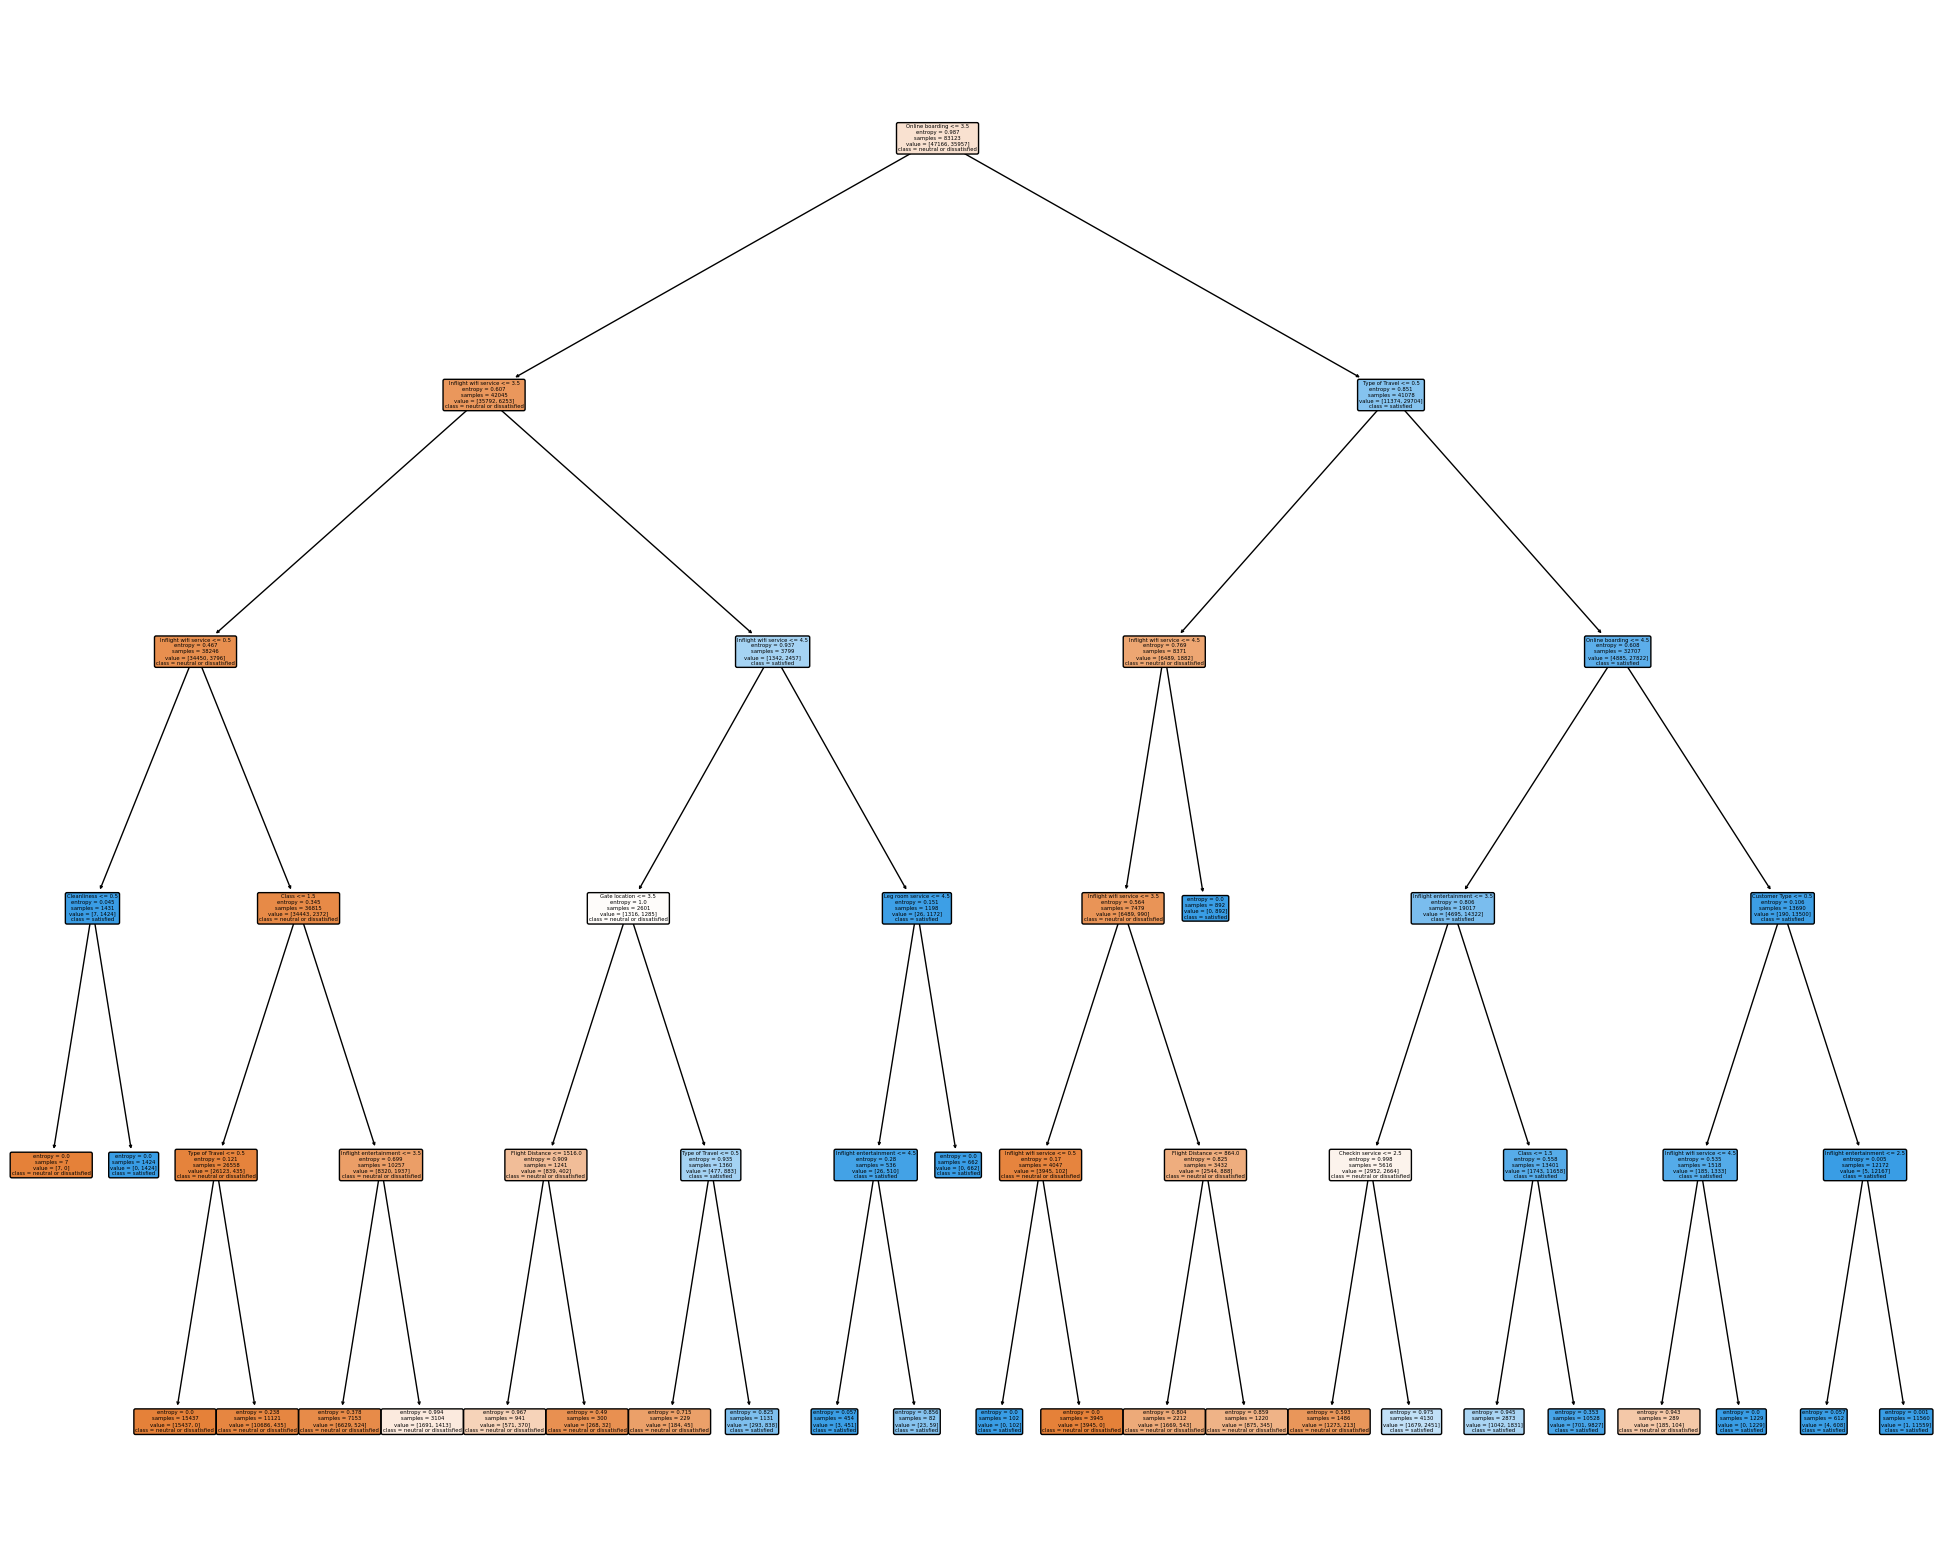

In [70]:
tree.plot_tree(dt1, 
          feature_names = fn, 
          class_names = cn, 
          filled = True, 
          rounded = True)

fig.savefig('dtsatisfaction.jpg')

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,10), dpi=2000)

tree.plot_tree(dt, feature_names = fn, class_names = cn, filled = True, rounded = True)

fig.savefig('dt_satisfaction2.jpg', format = 'jpg', dpi = 2000)